# Picking Apart the LRP Class

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import scipy as sp
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

from models.submodels.interaction_gnn import InteractionGNN
from models.submodels.agnn import AGNN
from models.generation_utils import load_dataset

In [3]:
# load config
with open("toy_config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
model = InteractionGNN(config)

In [4]:
model = AGNN(config)

## Test Dataloading

In [5]:
model.setup(stage="fit")

Setting up dataset


In [6]:
sample = model.trainset[0]

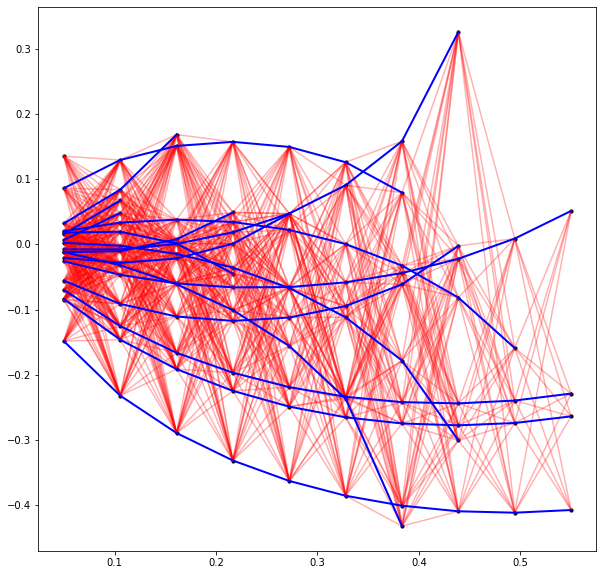

tensor(0.0767)


In [8]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.edge_index[:,~truth_mask],0], sample.x[sample.edge_index[:,~truth_mask],1], c='r', alpha=0.3)
    ax.plot(sample.x[sample.edge_index[:,truth_mask],0], sample.x[sample.edge_index[:,truth_mask],1], c='b', alpha=1, linewidth=2)
    plt.show()
    print(f"Purity: {sample.y.sum() / sample.y.shape[0]}")

plot_graph(sample)

## Train Model

In [10]:
logger = WandbLogger(
    project=config["project"], group="InitialTest", save_dir=config["artifacts"]
)
trainer = Trainer(
    gpus=1, max_epochs=config["max_epochs"], logger=logger
)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.